<a href="https://colab.research.google.com/github/mohamed-amine-elouerzli/Dogs-vs-cats/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

**Mini Projet Informatique-avancée**

**Réalisé par**  : *Elouerzli Mohamed amine et Ben bouzid Chamseddine*

In [3]:
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
import tensorflow

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Importation des données dogs-vs-cats (kaagle)**

In [6]:
! pip install -q kaggle

In [7]:
from google.colab import files

In [10]:
!mkdir -p ~/.kaggle


In [11]:
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:56<00:00, 22.6MB/s]
100% 1.06G/1.06G [00:56<00:00, 20.3MB/s]


In [13]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

**Training generators**

In [34]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**CNN MODEL**

In [17]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 2/10
625/625 [==============================] - 73s 117ms/step - loss: 0.5823 - accuracy: 0.7034 - val_loss: 0.5112 - val_accuracy: 0.7474
Epoch 3/10
625/625 [==============================] - 74s 118ms/step - loss: 0.4851 - accuracy: 0.7687 - val_loss: 0.4842 - val_accuracy: 0.7672
Epoch 4/10
625/625 [==============================] - 79s 126ms/step - loss: 0.4248 - accuracy: 0.8064 - val_loss: 0.4766 - val_accuracy: 0.7770
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.3845 - accuracy: 0.8274 - val_loss: 0.4258 - val_accuracy: 0.8014
Epoch 6/10
625/625 [==============================] - 73s 117ms/step - loss: 0.3175 - accuracy: 0.8615 - val_loss: 0.4405 - val_accuracy: 0.8116
Epoch 7/10
625/625 [==============================] - 74s 118ms/step - loss: 0.2401 - accuracy: 0.8976 - val_loss: 1.9820 - val_accuracy: 0.6004
Epoch 8/10
625/625 [==============================] - 73s 116ms/step - loss: 0.1766 - accuracy: 0.9282 - val_loss: 0.6034 - val_ac

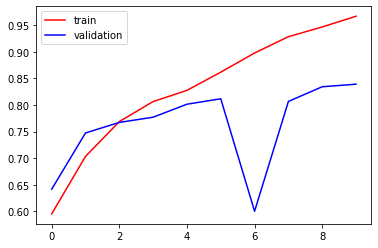

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

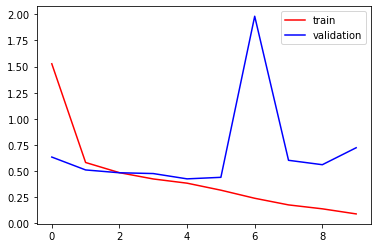

In [44]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [46]:
import cv2

In [68]:
test_img = cv2.imread('/content/train/cats/cat.10056.jpg')

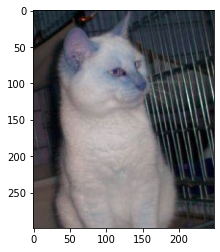

In [69]:
plt.imshow(test_img)

In [70]:
test_img.shape

(299, 248, 3)

In [71]:
test_img = cv2.resize(test_img,(256,256))

In [72]:
test_input = test_img.reshape((1,256,256,3))

In [73]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[7.430194e-12]], dtype=float32)

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

In [21]:
filenames = os.listdir("/content/train/cats")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df

,filename,category
0,cat.2208.jpg,0
1,cat.2210.jpg,0
2,cat.1857.jpg,0
3,cat.8873.jpg,0
4,cat.1440.jpg,0
...,...,...
9995,cat.3944.jpg,0
9996,cat.4780.jpg,0
9997,cat.10097.jpg,0
9998,cat.7536.jpg,0


In [22]:
filenames1 = os.listdir("/content/train/dogs")

categories1 = []
for filename in filenames1:
    category = filename.split('.')[0]
    if category == 'dog':
        categories1.append(1)
    else:
        categories1.append(0)

df1 = pd.DataFrame({
    'filename': filenames1,
    'category': categories1
}, index = [i for i in range(10000,20000,1)])
df1.head()

,filename,category
10000,dog.94.jpg,1
10001,dog.8644.jpg,1
10002,dog.12017.jpg,1
10003,dog.5458.jpg,1
10004,dog.3214.jpg,1


In [23]:
df3 = pd.concat([df, df1])

In [24]:
df3


,filename,category
0,cat.2208.jpg,0
1,cat.2210.jpg,0
2,cat.1857.jpg,0
3,cat.8873.jpg,0
4,cat.1440.jpg,0
...,...,...
19995,dog.4693.jpg,1
19996,dog.3074.jpg,1
19997,dog.1935.jpg,1
19998,dog.4725.jpg,1


In [25]:
df3 = df3.sample(frac = 1)

In [26]:
df3.head()

,filename,category
14686,dog.4759.jpg,1
1951,cat.6254.jpg,0
10981,dog.4704.jpg,1
4589,cat.12063.jpg,0
14402,dog.5927.jpg,1


**VGG16 MODEL**

In [27]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

58889256/58889256 [==============================] - 4s 0us/step


In [28]:
model1 = Model(pre_trained_model.input, x)

model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [29]:
train_df, validate_df = train_test_split(df3, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [30]:
history = model1.fit_generator(generator=train_ds,steps_per_epoch=2, epochs = 10, validation_data=validation_ds)

Epoch 1/10


<ipython-input-30-ea28ce87edfb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(generator=train_ds,steps_per_epoch=2, epochs = 10, validation_data=validation_ds)


2/2 [==============================] - 40s 28s/step - loss: 0.7412 - accuracy: 0.6562 - val_loss: 0.7223 - val_accuracy: 0.4838
Epoch 2/10
2/2 [==============================] - 29s 29s/step - loss: 0.9558 - accuracy: 0.4531 - val_loss: 0.7183 - val_accuracy: 0.4912
Epoch 3/10
2/2 [==============================] - 27s 27s/step - loss: 0.7610 - accuracy: 0.5312 - val_loss: 0.7131 - val_accuracy: 0.5040
Epoch 4/10
2/2 [==============================] - 28s 28s/step - loss: 0.9195 - accuracy: 0.4531 - val_loss: 0.7067 - val_accuracy: 0.5136
Epoch 5/10
2/2 [==============================] - 28s 28s/step - loss: 0.8776 - accuracy: 0.5000 - val_loss: 0.6998 - val_accuracy: 0.5240
Epoch 6/10
2/2 [==============================] - 27s 27s/step - loss: 0.8057 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.5410
Epoch 7/10
2/2 [==============================] - 28s 27s/step - loss: 0.6610 - accuracy: 0.6250 - val_loss: 0.6842 - val_accuracy: 0.5606
Epoch 8/10
2/2 [======================

In [31]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


<ipython-input-31-dcaaaf1b5551>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
<ipython-input-31-dcaaaf1b5551>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


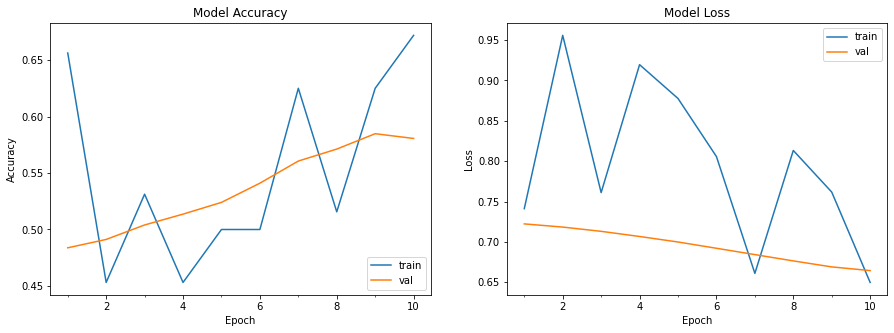

In [32]:
plot_model_history(history)

In [45]:
filenames2 = os.listdir("/content/test/cats")

categories2 = []
for filename in filenames2:
    category = filename.split('.')[0]
    if category == 'dog':
        categories2.append(1)
    else:
        categories2.append(0)

df4 = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

filenames3 = os.listdir("/content/test/dogs")

categories3 = []
for filename in filenames3:
    category = filename.split('.')[0]
    if category == 'dog':
        categories3.append(1)
    else:
        categories3.append(0)

df5 = pd.DataFrame({
    'filename': filenames3,
    'category': categories3
}, index = [i for i in range(2500,5000,1)])
df6 = pd.concat([df4, df5])
df6 = df6.sample(frac = 1)



In [46]:
# generators
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 5000 files belonging to 2 classes.


In [47]:
Y_val = df6['category']
y_pred =  model1.predict_generator(test_ds)

<ipython-input-47-d9670a8a49a8>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred =  model1.predict_generator(test_ds)


In [49]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

In [50]:
y_pred.size

5000

In [48]:
Y_val.size

5000

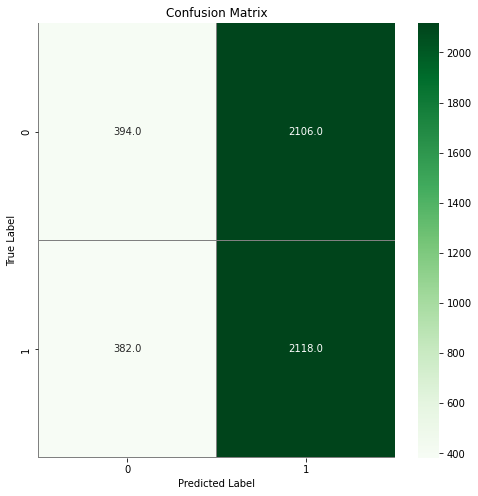

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val, y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [53]:
from sklearn.metrics import classification_report
report = classification_report(Y_val, y_final, target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.51      0.16      0.24      2500
           1       0.50      0.85      0.63      2500

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.44      5000
weighted avg       0.50      0.50      0.44      5000



In [54]:
predict = model1.predict_generator(test_ds)
threshold = 0.5
df6['prediction'] = np.where(predict > threshold, 1,0)


<ipython-input-54-cd503ce1d0a7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model1.predict_generator(test_ds)


In [57]:
df6

,filename,category,prediction
3277,dog.4689.jpg,1,1
3956,dog.6942.jpg,1,1
698,cat.4379.jpg,0,1
4635,dog.12133.jpg,1,1
4784,dog.7843.jpg,1,1
...,...,...,...
4559,dog.1446.jpg,1,1
1203,cat.2253.jpg,0,1
3647,dog.12139.jpg,1,0
0,cat.3013.jpg,0,1
